In [1]:
import os

In [2]:
import os 
print(os.getcwd())

C:\Users\jaini


In [3]:
os.chdir("/home/jaini/")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/home/jaini/'

In [ ]:
import os 
os.chdir("/mnt/shared")
print(os.getcwd())
print(os.listdir())

In [ ]:
import os

# Use Windows path instead of Linux path
os.chdir("C:\\NIDS")

# Verify the current working directory
print(os.getcwd())

# List files in the directory
print(os.listdir())


In [ ]:
import os

# Change directory to NIDS folder
os.chdir("C:\\NIDS")

# List all files in the directory
print(os.listdir())


In [ ]:
!python snort_log_to_csv.py

In [ ]:
output_csv = "C:\\NIDS\\snort_logs.csv

In [ ]:
!python snort_log_to_csv.py

In [ ]:
python C:\NIDS\snort_log_to_csv.py

In [ ]:
!python C:\NIDS\snort_log_to_csv.py

In [ ]:
import pandas as pd

df = pd.read_csv("C:\\NIDS\\snort_logs.csv")
print(df.head())


In [ ]:
print(df.info())
print(df.describe())
print(df['Alert_Type'].value_counts())

In [ ]:
import matplotlib.pyplot as plt

df['Alert_Type'].value_counts().plot(kind='bar', figsize=(10,5))
plt.xlabel("Alert Type")
plt.ylabel("Count")
plt.title("Snort Alert Frequency")
plt.show()


In [ ]:
print(df.columns)

In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # Removes extra spaces

# Try using the correct column name from Step 1
df['Attack_Type'].value_counts().plot(kind='bar', figsize=(10,5))
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Snort Alert Frequency")
plt.show()


In [ ]:
print(df['Attack_Type'].head())
print(df['Attack_Type'].isnull().sum())

In [ ]:
df = pd.read_csv("C:\\NIDS\\snort_logs.csv", encoding='utf-8')
print(df.head())

In [ ]:
df['Protocol'].value_counts().plot(kind='bar', figsize=(10,5))
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.title("Frequency of Different Protocols")
plt.show()

In [ ]:
top_source_ips = df['Source_IP'].value_counts().head(10)
top_dest_ips = df['Destination_IP'].value_counts().head(10)

print("Top 10 Source IPs:\n", top_source_ips)
print("\nTop 10 Destination IPs:\n", top_dest_ips)


In [ ]:
attack_protocol = df.groupby(['Attack_Type', 'Protocol']).size().unstack()
attack_protocol.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Attack_Type")
plt.ylabel("Count")
plt.title("Attack Type vs Protocol")
plt.legend(title="Protocol")
plt.show()

In [ ]:
icmp_traffic = df[df['Protocol'] == 'ICMP']
print("ICMP Traffic Overview:\n", icmp_traffic.head())

In [ ]:
df.to_csv("C:\\NIDS\\snort_insights.csv", index=False)
print("Insights exported successfully!")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical columns to numerical values
label_encoder = LabelEncoder()
df['Attack_Type'] = label_encoder.fit_transform(df['Attack_Type'])  # Encoding attack types
df['Protocol'] = label_encoder.fit_transform(df['Protocol'])  # Encoding protocol names

# Selecting Features and Target
X = df.drop(columns=['Attack_Type'])  # Features (excluding target column)
y = df['Attack_Type']  # Target (attack type)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into Train & Test Sets (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Preprocessing Complete!")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-Numeric Columns:", non_numeric_cols)

# Convert categorical columns to numerical values
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    X[col] = label_encoder.fit_transform(X[col])  # Convert each non-numeric column to numbers

# Check if all columns are numeric now
print("Updated Columns Data Types:\n", X.dtypes)

# Selecting Features and Target
y = df['Attack_Type']  # Target (attack type)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Now, all values should be numeric!

# Splitting into Train & Test Sets (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Preprocessing Complete!")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoder = LabelEncoder()
df['Attack_Type'] = label_encoder.fit_transform(df['Attack_Type'])
df['Protocol'] = label_encoder.fit_transform(df['Protocol'])

# Select features (X) and target (y)
X = df.drop(columns=['Attack_Type'])
y = df['Attack_Type']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Preprocessing Complete!")


In [ ]:
import pandas as pd

# Load the dataset (change 'your_file.csv' to your actual filename)
df = pd.read_csv('your_file.csv')

# Check if data is loaded correctly
print(df.head())
print(df.info())


In [ ]:
df = pd.read_csv("C:\\NIDS\\snort_logs.csv")

In [ ]:
import os
print(os.getcwd())

In [ ]:
print(os.listdir())

In [ ]:
import pandas as pd

file_path = "C:\\NIDS\\snort_logs.csv"  # Update if necessary
df = pd.read_csv(file_path)

print(df.head())  # Verify data is loaded
print(df.info())  # Check column names & data types


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "C:\\NIDS\\snort_logs.csv"  
df = pd.read_csv(file_path)


label_encoder = LabelEncoder()
df['Attack_Type'] = label_encoder.fit_transform(df['Attack_Type'])
df['Protocol'] = label_encoder.fit_transform(df['Protocol'])
df['Source_IP'] = label_encoder.fit_transform(df['Source_IP'])
df['Destination_IP'] = label_encoder.fit_transform(df['Destination_IP'])


X = df.drop(columns=['Attack_Type'])  
y = df['Attack_Type']  

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

In [ ]:
print(set(X_train.index) & set(X_test.index))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Important Score")
plt.title("Feature Importance in Random Forest")
plt.show()


In [ ]:
pip install shap

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,        # Keep at 100 trees (enough for stability)
    max_depth=10,            # Limit tree depth to prevent overfitting
    min_samples_split=5,     # Require at least 5 samples to split a node
    min_samples_leaf=3,      # Require at least 3 samples in a leaf node
    max_features="sqrt",     # Use sqrt(features) at each split to add randomness
    random_state=42,
    class_weight="balanced"  # Helps with imbalanced data
)

model.fit(X_train, y_train)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc}")
print(f"Testing Accuracy: {test_acc}")


In [ ]:
X_train_filtered = X_train.drop(columns=["Source_IP", "Destination_IP"], errors="ignore")
X_test_filtered = X_test.drop(columns=["Source_IP", "Destination_IP"], errors="ignore")

model.fit(X_train_filtered, y_train)

print("New Accuracy:", model.score(X_test_filtered, y_test))


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


In [ ]:
print(y.value_counts())

In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)


In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)

print("Best Parameters:", grid_search.best_params_)


In [ ]:
import joblib

joblib.dump(model, 'intrusion_detection_model.pkl')


In [ ]:
loaded_model = joblib.load('intrusion_detection_model.pkl')
prediction = loaded_model.predict(new_data)


In [ ]:
import numpy as np

# Select a random sample from X_test
new_data = X_test.iloc[0].values.reshape(1, -1)  # Reshape for model prediction

# Make a prediction
prediction = loaded_model.predict(new_data)
print("Prediction:", prediction)


In [ ]:
# Select the first 5 rows of X_test
new_data = X_test.iloc[:5]

# Make predictions
predictions = loaded_model.predict(new_data)
print("Predictions:", predictions)


In [ ]:
# Create a new sample (modify values based on your dataset)
new_data = np.array([[0.5, 100, 200, 0, 1, 0.3]])  
# Make prediction
prediction = loaded_model.predict(new_data)
print("Prediction:", prediction)


In [ ]:
print("Number of features in training data:", X_train.shape[1])


In [ ]:
import numpy as np

# Ensure new_data has the same number of features as X_train
new_data = np.array([[0.5, 100, 200]])  # Adjust this based on your dataset

# Make prediction
prediction = loaded_model.predict(new_data)
print("Prediction:", prediction)


In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame with correct column names
feature_names = X_train.columns  # Get feature names from training data
new_data_df = pd.DataFrame(new_data, columns=feature_names)

# Make prediction
prediction = loaded_model.predict(new_data_df)
print("Prediction:", prediction)


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = loaded_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = loaded_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
import joblib
loaded_model = joblib.load("Intrusion_detection_model.pkl")
y_pred = loaded_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
print(X_test.shape, y_test.shape)

In [ ]:
import joblib

# Load saved data if previously stored
X_test = joblib.load("X_test.pkl")  # Adjust the filename if different
y_test = joblib.load("y_test.pkl")  # Adjust the filename if different


In [ ]:
import pandas as pd
df = pd.read_csv("your dataset.csv")
print(df.head())

In [ ]:
import joblib

df = joblib.load("your_dataset.pkl")  # Load dataset from pickle file


In [ ]:
import os
print(os.listdir())

In [ ]:
import os

# Check for any CSV files in the directory
csv_files = [f for f in os.listdir() if f.endswith(".csv")]
print("Available CSV files:", csv_files)


In [ ]:
import os
import glob

# Search in parent directories
csv_files = glob.glob("../**/*.csv", recursive=True)
pkl_files = glob.glob("../**/*.pkl", recursive=True)

print("Found CSV files:", csv_files)
print("Found PKL files:", pkl_files)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import joblib

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
df['target'] = y

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

# Save the new dataset for future use
df.to_csv("synthetic_dataset.csv", index=False)
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_test, "y_test.pkl")

print("✅ Synthetic dataset created and saved.")


In [ ]:
import joblib

X_test = joblib.load("X_test.pkl")
y_test = joblib.load("y_test.pkl")

loaded_model = joblib.load("Intrusion_detection_model.pkl")
y_pred = loaded_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix

# Load test data
X_test = joblib.load("X_test.pkl")
y_test = joblib.load("y_test.pkl")

# Load trained model
loaded_model = joblib.load("Intrusion_detection_model.pkl")

# 🔹 FIXED TYPO: Changed `.pedict()` to `.predict()`
y_pred = loaded_model.predict(X_test)

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
import joblib
import pandas as pd

# Load test data
X_test = joblib.load("X_test.pkl")
y_test = joblib.load("y_test.pkl")

# Load trained model
loaded_model = joblib.load("Intrusion_detection_model.pkl")

# Ensure X_test is a DataFrame with the correct columns
expected_columns = loaded_model.feature_names_in_  # Get expected feature names
X_test = pd.DataFrame(X_test, columns=expected_columns)  # Assign correct names

# Make predictions
y_pred = loaded_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
import joblib
X_train = joblib.load("X_train.pkl")
X_test = joblib.load("X_test.pkl")

print(type(X_train))  # Should be <class 'pandas.DataFrame'>
print(type(X_test))   # If <class 'numpy.ndarray'>, it lost column names!


In [ ]:
y_proba = loaded_model.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred = (y_proba > threshold).astype(int)

In [ ]:
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight="balanced")

In [ ]:
print(set(loaded_model.feature_names_in_) - set(X_test.columns))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
        "n_estimators": [50, 100, 200],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(
        RandomForestClassifier(class_weight="balanced", random_state=42),
        param_grid,
        cv=3,
        scoring="accuracy",
        n_jobs=-1,
        verbose=2
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)

print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
print("Training Features:", best_model.feature_names_in_)
print("Testing Features:", X_test.columns)

In [ ]:
X_test.columns = best_model.feature_names_in

In [ ]:
print(X_train.columns)

In [ ]:
for col in categorical_features:
    print(f"Before Encoding - {col}:\n", df[col].unique())
    print(f"After Encoding - {col}:\n", X_train[col].unique())
    print("-" * 50)

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical Features:", categorical_features)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_features:
        print(f"Before Encoding - {col}:\n", df[col].unique())
    if col in X_train.columns:
            print(f"After Encoding - {col}:\n", X_train[col].unique())
        print("-" * 50)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in categorical_features:
    print(f"Before Encoding - {col}:\n", df[col].unique())

    if col in X_train.columns:  
        print(f"After Encoding - {col}:\n", X_train[col].unique())

    print("-" * 50)


In [ ]:
print(categorical_features)

In [ ]:
print(X_train.columns)

In [ ]:
print(df.dtypes)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
print("Training Features:\n", X_train.columns)
print("Testing Features:\n", X_test.columns)


In [ ]:
X_test.columns = X_train.columns


In [ ]:
print(df.columns)  


In [ ]:
X = df[['Source_IP', 'Destination_IP', 'Protocol', 'other_features...']]  # Select proper features
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Columns in dataset:\n", df.columns)


In [ ]:
# Rename X_test columns to match training data
X_test.columns = [f'feature_{i}' for i in range(len(X_test.columns))]


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("X_train Columns:\n", list(X_train.columns))
print("X_test Columns:\n", list(X_test.columns))


In [ ]:
# Select only columns that were used during training
X_test = X_test[X_train.columns]


In [ ]:
print("Columns in X_train:\n", list(X_train.columns))
print("Columns in X_test:\n", list(X_test.columns))


In [ ]:
# Identify missing columns
missing_cols = set(X_train.columns) - set(X_test.columns)

# Add missing columns with default value 0
for col in missing_cols:
    X_test[col] = 0  # You can also use np.nan if needed

# Ensure the column order matches X_train
X_test = X_test[X_train.columns]


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print(y_pred[:5])


In [ ]:
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
import numpy as np
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np

print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in X_test:", np.isnan(X_test).sum())


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_test = imputer.fit_transform(X_test)
y_pred = model.predict(X_test)

In [ ]:
imputer = SimpleImputer(strategy="median")
X_test = imputer.fit_transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

In [ ]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
import pandas as pd
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
X_train.columns = [f"feature_{i}" for i in range(X_train.shape[1])]
X_test.columns = [f"feature_{i}" for i in range(X_test.shape[1])]


In [ ]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classfication Report:\n", classification_report(y_test,y_pred))

In [ ]:
print(classification_report(y_test, y_pred, zero_division=1))

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
import numpy as np

print("Class Distribution before SMOTE:", np.bincount(y_train))
print("Class distribution after SMOTE:", np.bincount(y_train_resampled))

In [ ]:
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
import numpy as np
print("Class distribution in test set:", np.bincount(y_test))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))


In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_probs > 0.4).astype(int)  # Reduce threshold from 0.5 to 0.4

print(classification_report(y_test, y_pred, zero_division=1))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=len(y_train_resampled)/sum(y_train_resampled))
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))


In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek()
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)


In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Calculate class imbalance ratio
imbalance_ratio = sum(y_train_resampled == 0) / sum(y_train_resampled == 1)

# Train XGBoost with correct scale_pos_weight
model = XGBClassifier(scale_pos_weight=imbalance_ratio, use_label_encoder=False, eval_metric="logloss")

model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))


In [ ]:
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Calculate class imbalance ratio
imbalance_ratio = sum(y_train_resampled == 0) / sum(y_train_resampled == 1)

# Train XGBoost with correct scale_pos_weight
model = XGBClassifier(scale_pos_weight=imbalance_ratio, use_label_encoder=False, eval_metric="logloss")

model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, zero_division=1))


In [ ]:
print(X_train.shape, y_train.shape)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd

df = pd.read_csv("your_dataset.csv") 

print(df.head())

print(df.columns)


In [ ]:
whos DataFrame

In [ ]:
import os
print(os.listdir())

In [ ]:
import pandas as pd

df = pd.read_csv("synthetic_dataset.csv")
print(df.head())  # Show the first few rows
print(df.columns)  # Display all column names


In [ ]:
# Define X (features) and y (target)
X = df.drop(columns=['target'])  
y = df['target']  


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
from imblearn.combine import SMOTETomek

# Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees
    'max_depth': [3, 5, 7],            # Tree depth
    'learning_rate': [0.01, 0.1, 0.2], # Step size
    'subsample': [0.7, 0.8, 1],        # Data fraction per round
    'colsample_bytree': [0.7, 0.8, 1]  # Feature fraction per tree
}

# Initialize the model
xgb_model = XGBClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best parameters
best_xgb = XGBClassifier(**grid_search.best_params_, random_state=42)
best_xgb.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_best = best_xgb.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import accuracy_score, classification_report
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nTuned Classification Report:\n", classification_report(y_test, y_pred_best))


In [ ]:
param_grid = {
    'n_estimators': [100, 200],       # Reduce choices
    'max_depth': [3, 5],              # Fewer depth options
    'learning_rate': [0.05, 0.1],     # Smaller range
    'subsample': [0.8, 1],            # Fewer values
    'colsample_bytree': [0.8, 1]      # Fewer values
}


In [116]:
print(type(X_train_resampled))

NameError: name 'X_train_resampled' is not defined

In [112]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

param_dist = {
    'n_estimators': np.arange(100, 301, 100),
    'max_depth': np.arange(3, 8, 2),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

random_search = RandomizedSearchCV(
    XGBClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Limits the number of tests
    cv=3,       # Use fewer cross-validation folds
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train_resampled, y_train_resampled)
print("Best Parameters:", random_search.best_params_)


NameError: name 'X_train_resampled' is not defined

In [ ]:
best_params = random_search.best_params_

xgb_best = XGBClassifier(**best_params, random_state=42)
xgb_best.fit(X_train_resampled, y_train_resampled)

y_pred_best = xgb_best.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Optimized XGBoost Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


In [ ]:
import joblib
joblib.dump(xgb_best, 'nids_model.pkl')
print("Model Saved successfully!")

In [ ]:
print(xgb_best)

In [ ]:
from xgboost import XGBClassifier

xgb_best = XGBClassifier(**best_params, random_state=42)
xgb_best.fit(X_train_resampled, y_train_resampled)


In [108]:
print(best_params)

NameError: name 'best_params' is not defined

In [122]:
!pip install pandas matplotlib scikit-learn xgboost

In [124]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier  # Import XGBoost classifier

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [126]:

os.chdir("C:\\NIDS") 


df = pd.read_csv("snort_logs.csv") 
print(df.head())  


                Attack_Type Protocol       Source_IP  Destination_IP
0  BAD-TRAFFIC same SRC/DST     IGMP         0.0.0.0      224.0.0.22
1  BAD-TRAFFIC same SRC/DST     IGMP         0.0.0.0      224.0.0.22
2        ICMP Ping Detected     ICMP   192.168.32.18  192.168.34.131
3        ICMP Ping Detected     ICMP  192.168.30.134  192.168.34.131
4        ICMP Ping Detected     ICMP  192.168.30.134  192.168.34.131


In [128]:

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=["Alert_Type"])  
y = df["Alert_Type"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


KeyError: "['Alert_Type'] not found in axis"

In [130]:
print(df.columns)

Index(['Attack_Type_ICMP Ping Detected', 'Protocol_IGMP',
       'Source_IP_116.119.119.92', 'Source_IP_142.250.192.110',
       'Source_IP_152.52.36.105', 'Source_IP_172.26.143.104',
       'Source_IP_192.168.30.134', 'Source_IP_192.168.32.18',
       'Source_IP_192.168.32.185', 'Source_IP_192.168.34.102',
       'Source_IP_192.168.35.46', 'Source_IP_192.168.36.148',
       'Source_IP_192.168.37.215', 'Source_IP_192.168.41.188',
       'Source_IP_192.168.44.49', 'Source_IP_192.168.45.117',
       'Source_IP_192.168.69.105', 'Source_IP_199.232.214.172',
       'Source_IP_35.213.188.76', 'Source_IP_35.213.7.90',
       'Source_IP_80.249.212.183', 'Destination_IP_172.26.143.104',
       'Destination_IP_172.26.143.201', 'Destination_IP_172.26.143.206',
       'Destination_IP_192.168.147.226', 'Destination_IP_192.168.26.230',
       'Destination_IP_192.168.34.103', 'Destination_IP_192.168.34.131',
       'Destination_IP_192.168.36.139', 'Destination_IP_192.168.36.148',
       'Destination_

In [132]:
print(df.head())

   Attack_Type_ICMP Ping Detected  Protocol_IGMP  Source_IP_116.119.119.92  \
0                           False           True                     False   
1                           False           True                     False   
2                            True          False                     False   
3                            True          False                     False   
4                            True          False                     False   

   Source_IP_142.250.192.110  Source_IP_152.52.36.105  \
0                      False                    False   
1                      False                    False   
2                      False                    False   
3                      False                    False   
4                      False                    False   

   Source_IP_172.26.143.104  Source_IP_192.168.30.134  \
0                     False                     False   
1                     False                     False   
2                

In [134]:

df = pd.get_dummies(df, drop_first=True)


X = df.drop(columns=["Attack_Type"])  
y = df["Attack_Type"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


KeyError: "['Attack_Type'] not found in axis"

In [136]:
# Convert categorical variables into numerical format
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target variable (y)
X = df.drop(columns=["Attack_Type_ICMP Ping Detected"])  # Drop the target column from features
y = df["Attack_Type_ICMP Ping Detected"]  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing sets
print(X_train.shape, X_test.shape)


(124, 38) (32, 38)


In [144]:
X_train = X_train.astype(int)
y_train = y_train.astype(int)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape, y_train_resampled.shape)


(230, 38) (230,)


In [146]:
print(X_train_resampled.shape, y_train_resampled.shape)

(230, 38) (230,)


In [148]:
print(type(X_train_resampled), type(y_train_resampled))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [150]:
X_train_resampled = X_train_resampled.to_numpy()
y_train_resampled = y_train_resampled.to_numpy()


In [152]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter search space
param_dist = {
    'n_estimators': np.arange(100, 301, 100),
    'max_depth': np.arange(3, 9, 2),
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.7, 0.8, 1]
}

# Initialize the classifier
xgb = XGBClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=10, cv=3, verbose=1, n_jobs=-1
)

# Train the model
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [154]:
best_params = random_search.best_params_
final_xgb = XGBClassifier(**best_params, random_state=42)
final_xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [156]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = final_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00         3
        True       1.00      1.00      1.00        29

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [158]:
import joblib
joblib.dump(final_xgb, "xgboost_model.pkl")

['xgboost_model.pkl']

In [160]:
train_pred = final_xgb.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, train_pred)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 1.0


In [162]:
xgb = XGBClassifier(n_estimators=50, max_depth=3, random_state=42)


In [164]:
xgb = XGBClassifier(n_estimators=100, max_depth=3, reg_alpha=0.1, reg_lambda=1, random_state=42)


In [166]:
xgb = XGBClassifier(
    n_estimators=100, max_depth=3,
    subsample=0.8, 
    colsample_bytree=0.8,  
    random_state=42
)


In [168]:
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [170]:
from sklearn.metrics import accuracy_score, classification_report

y_train_pred = xgb.predict(X_train_resampled)
y_test_pred = xgb.predict(X_test)

train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

print("\nTrain Classification Report:\n", classification_report(y_train_resampled, y_train_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))


Train Accuracy: 1.0
Test Accuracy: 1.0

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       115

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230


Test Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00         3
        True       1.00      1.00      1.00        29

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [172]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb)
plt.show()

ValueError: tree must be Booster, XGBModel or dict instance

In [174]:
xgb = XGBClassifier(
    n_estimators=50,    # Reduce the number of trees
    max_depth=2,        # Reduce tree depth
    learning_rate=0.05, # Lower learning rate
    subsample=0.7,      # Use only 70% of data per tree
    colsample_bytree=0.7, # Use only 70% of features per tree
    reg_alpha=0.5,      # L1 regularization
    reg_lambda=1.0,     # L2 regularization
    random_state=42
)


In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [180]:
xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=["logloss"],
    early_stopping_rounds=10,
    verbose=True
)


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'eval_metric'

In [182]:
xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=["logloss"],  # Use a list format
    early_stopping_rounds=10,
    verbose=True
)


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'eval_metric'

In [184]:
import xgboost
print(xgboost.__version__)

2.1.4


In [186]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=1.0,
    random_state=42,
    eval_metric="logloss" 
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [188]:
from xgboost import XGBClassifier, early_stop

xgb = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=1.0,
    random_state=42,
    eval_metric="logloss"  # Pass eval_metric in model initialization
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[early_stop(10)],  # Use callbacks for early stopping
    verbose=True
)


ImportError: cannot import name 'early_stop' from 'xgboost' (C:\Users\jaini\anaconda3\Lib\site-packages\xgboost\__init__.py)

In [190]:
from xgboost import XGBClassifier, callback

xgb = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=1.0,
    random_state=42,
    eval_metric="logloss"  # Pass eval_metric here
)

# Use callbacks for early stopping
early_stopping = callback.EarlyStopping(rounds=10, metric_name="logloss", data_name="validation_0")

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[early_stopping],  # Correct way to add early stopping
    verbose=True
)


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'callbacks'

In [192]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=1.0,
    random_state=42,
    eval_metric="logloss"  # Pass eval_metric here
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,  # ✅ Correct way to apply early stopping
    verbose=True
)


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [194]:
from xgboost import XGBClassifier, callback

xgb = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    eval_metric="logloss"
)

# Correct way to implement early stopping
early_stopping = callback.EarlyStopping(
    rounds=10, 
    metric_name="logloss", 
    data_name="validation_0"
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[early_stopping],  # ✅ Use callbacks
    verbose=True
)


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'callbacks'

In [196]:
import xgboost
print(xgboost.__version__)


2.1.4


In [198]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=50,
    max_depth=2
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="logloss",   # ✅ Define metric here
    early_stopping_rounds=10,  # ✅ Correct way for older versions
    verbose=True
)


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'eval_metric'

In [200]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    eval_metric="logloss"
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [202]:
from xgboost import XGBClassifier

# Move early_stopping_rounds to the classifier initialization
xgb = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    eval_metric="logloss",
    early_stopping_rounds=10  # Move this here
)

# Remove early_stopping_rounds from fit()
xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

[0]	validation_0-logloss:0.21123
[1]	validation_0-logloss:0.15044
[2]	validation_0-logloss:0.11140
[3]	validation_0-logloss:0.08454
[4]	validation_0-logloss:0.06539
[5]	validation_0-logloss:0.05146
[6]	validation_0-logloss:0.04114
[7]	validation_0-logloss:0.03340
[8]	validation_0-logloss:0.02752
[9]	validation_0-logloss:0.02300
[10]	validation_0-logloss:0.02296
[11]	validation_0-logloss:0.02295
[12]	validation_0-logloss:0.02297
[13]	validation_0-logloss:0.02299
[14]	validation_0-logloss:0.02302
[15]	validation_0-logloss:0.02305
[16]	validation_0-logloss:0.01954
[17]	validation_0-logloss:0.01956
[18]	validation_0-logloss:0.01957
[19]	validation_0-logloss:0.01958
[20]	validation_0-logloss:0.01959
[21]	validation_0-logloss:0.01960
[22]	validation_0-logloss:0.01961
[23]	validation_0-logloss:0.01962
[24]	validation_0-logloss:0.01962
[25]	validation_0-logloss:0.01962
[26]	validation_0-logloss:0.01963


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [206]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier (without early_stopping_rounds)
xgb = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    eval_metric="logloss"  # ✅ This is fine here
)

# Fit model with early stopping applied inside fit()
xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,  # ✅ Correct placement
    verbose=True
)


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [208]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = xgb.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

NotFittedError: need to call fit or load_model beforehand

In [210]:
xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)


[0]	validation_0-logloss:0.21123
[1]	validation_0-logloss:0.15044
[2]	validation_0-logloss:0.11140
[3]	validation_0-logloss:0.08454
[4]	validation_0-logloss:0.06539
[5]	validation_0-logloss:0.05146
[6]	validation_0-logloss:0.04114
[7]	validation_0-logloss:0.03340
[8]	validation_0-logloss:0.02752
[9]	validation_0-logloss:0.02300
[10]	validation_0-logloss:0.02296
[11]	validation_0-logloss:0.02295
[12]	validation_0-logloss:0.02297
[13]	validation_0-logloss:0.02299
[14]	validation_0-logloss:0.02302
[15]	validation_0-logloss:0.02305
[16]	validation_0-logloss:0.01954
[17]	validation_0-logloss:0.01956
[18]	validation_0-logloss:0.01957
[19]	validation_0-logloss:0.01958
[20]	validation_0-logloss:0.01959
[21]	validation_0-logloss:0.01960
[22]	validation_0-logloss:0.01961
[23]	validation_0-logloss:0.01962
[24]	validation_0-logloss:0.01962
[25]	validation_0-logloss:0.01962
[26]	validation_0-logloss:0.01963
[27]	validation_0-logloss:0.01963
[28]	validation_0-logloss:0.01963
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [212]:
if hasattr(xgb, "classes_"): 
    y_pred = xgb.predict(X_test)
    print("Model Prediction Successful!")
else:
    print("Model Not Trained! Run xgb.fit() first.")


Model Prediction Successful!


In [214]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = xgb.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 3  0]
 [ 0 29]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00         3
        True       1.00      1.00      1.00        29

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [218]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring="accuracy")
print("Cross Validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross Validation scores: [0.92 0.92 1.   1.   1.  ]
Mean accuracy: 0.968


In [222]:
import matplotlib.pylot as plt
from xgboost import plot_importance

plot_importance(xgb)
plt.show()

ModuleNotFoundError: No module named 'matplotlib.pylot'

In [224]:
import matplotlib.pyplot as plt


In [226]:
!pip install matplotlib


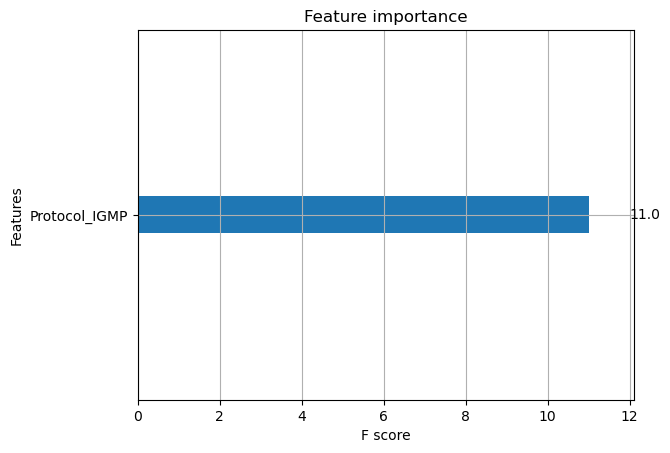

In [228]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb)
plt.show()


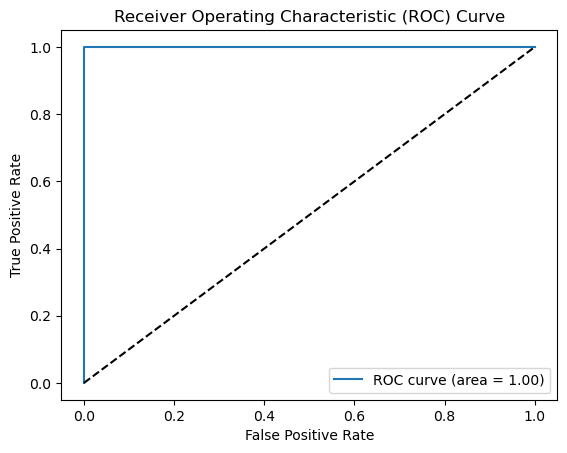

In [230]:
from sklearn.metrics import roc_curve, auc

y_proba = xgb.predict_proba(X_test)[:, 1] 
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [232]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", cv_scores)
print("Mean AUC score:", cv_scores.mean())


Cross-validation AUC scores: [1. 1. 1. 1. 1.]
Mean AUC score: 1.0


In [234]:

duplicate_rows = X_train.merge(X_test, how='inner')
print(f"Number of duplicate rows between train and test: {len(duplicate_rows)}")


Number of duplicate rows between train and test: 560


In [236]:
from sklearn.model_selection import train_test_split

# Re-split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Verify there are no duplicates now
duplicate_rows = X_train.merge(X_test, how='inner')
print(f"Number of duplicate rows after re-splitting: {len(duplicate_rows)}")


Number of duplicate rows after re-splitting: 560


In [238]:

X = X.drop_duplicates()
y = y.loc[X.index]  # Ensure y aligns with the cleaned X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

duplicate_rows = X_train.merge(X_test, how='inner')
print(f"Number of duplicate rows after re-splitting: {len(duplicate_rows)}")


Number of duplicate rows after re-splitting: 0


In [240]:
# Re-split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Train the model again
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [242]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb)
plt.show()


ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.

<Figure size 1000x600 with 0 Axes>

In [244]:
print(xgb.get_booster().get_dump())


['0:leaf=0.179757297\n', '0:leaf=0.156922802\n', '0:leaf=0.136505336\n', '0:leaf=0.118306004\n', '0:leaf=0.102183931\n', '0:leaf=0.0880012438\n', '0:leaf=0.0756066889\n', '0:leaf=0.0648356974\n', '0:leaf=0.055519551\n', '0:leaf=0.0474903472\n', '0:leaf=0.0405900776\n', '0:leaf=0.0346725285\n', '0:leaf=0.0296051316\n', '0:leaf=0.0252709556\n', '0:leaf=0.0215669237\n', '0:leaf=0.018403396\n', '0:leaf=0.0157021545\n', '0:leaf=0.0133968871\n', '0:leaf=0.0114295408\n', '0:leaf=0.00975055527\n', '0:leaf=0.00831881911\n', '0:leaf=0.00709672598\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n', '0:leaf=0\n']


In [246]:
xgb.fit(X_train, y_train)  

plt.figure(figsize=(10, 6))
plot_importance(xgb)
plt.show()


ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.

<Figure size 1000x600 with 0 Axes>

Feature Importance: {}


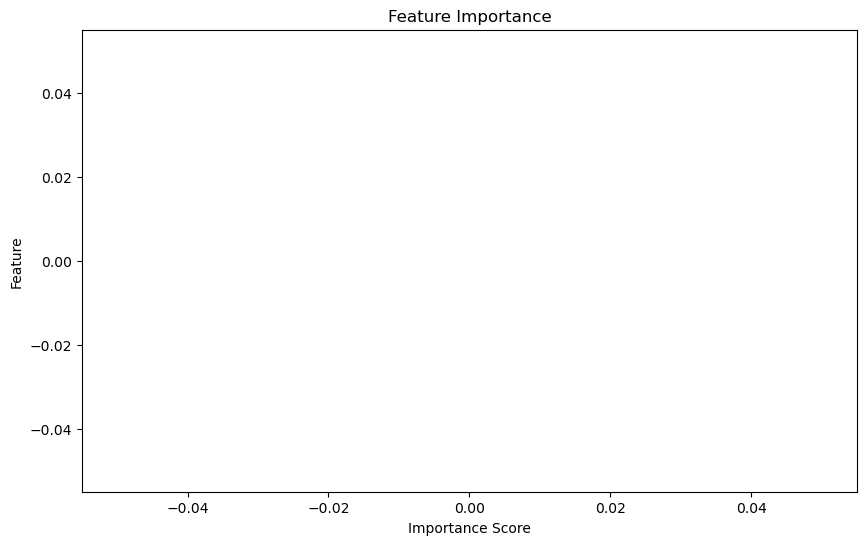

In [248]:
booster = xgb.get_booster()
importance = booster.get_score(importance_type='weight')  # Can also use 'gain' or 'cover'
print("Feature Importance:", importance)

# Convert to Pandas DataFrame for visualization
import pandas as pd

importance_df = pd.DataFrame(list(importance.items()), columns=["Feature", "Importance"])
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot manually
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


In [1]:
X = X.drop_duplicates()

NameError: name 'X' is not defined

In [3]:
print(dir())

['In', 'Out', '_', '_2', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__pandas', '__session__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_ih', '_ii', '_iii', '_oh', 'dataframe_columns', 'dataframe_hash', 'dtypes_str', 'exit', 'get_dataframes', 'get_ipython', 'getpass', 'hashlib', 'import_pandas_safely', 'is_data_frame', 'json', 'open', 'quit']


In [5]:
%whos DataFrame


No variables match your requested type.


In [7]:
import pandas as pd
df = pd.read_csv("your_dataset.csv")
print(df.head())  # Check first few rows


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

In [9]:
from IPython import get_ipython

ipython = get_ipython()
if ipython is not None:
    print(ipython.user_ns.keys())  # Shows all variables in memory


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', '_i', '_ii', '_iii', '_i1', '_i2', 'json', 'getpass', 'hashlib', 'import_pandas_safely', '__pandas', 'is_data_frame', 'dataframe_columns', 'dtypes_str', 'dataframe_hash', 'get_dataframes', '_2', '_i3', '_i4', '_4', '_i5', '_i6', '_6', '_i7', 'pd', '_i8', '_8', '_i9', 'ipython'])


In [11]:
print(df.columns)

NameError: name 'df' is not defined

In [13]:
%history -n 1-50  # Shows the last 50 commands you ran


   1: X = X.drop_duplicates()
   2:

import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".e

In [15]:
import os
print(os.listdir())

['.anaconda', '.bash_history', '.cache', '.conda', '.condarc', '.continuum', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.lesshst', '.matplotlib', '.ms-ad', '.packettracer', '.templateengine', '.viminfo', '.VirtualBox', '.virtual_documents', '.vscode', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'Cisco Packet Tracer 8.2.2', 'code', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'Github Demo', 'intrusion_detection_model.pkl', 'Links', 'Local Settings', 'Music', 'My Documents', 'myenv', 'NetHood', 'NIDS.ipynb', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{11dbabc9-e305-11ef-96e4-82e6d2fdeb92}.TM.blf', 'NTUSER.DAT{11dbabc9-e305-11ef-96e4-82e6d2fdeb92}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{11dbabc9-e305-11ef-96e4-82e6d2fdeb92}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'source', 'Start Menu', 'synthetic_dataset.

In [17]:
import pandas as pd

df = pd.read_csv("synthetic_dataset.csv")
print(df.head())  # Display the first few rows


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.669356  -1.495778  -0.870766   1.141831   0.021606   1.730630   
1   0.093372   0.785848   0.105754   1.272354  -0.846316  -0.979093   
2  -0.905797  -0.608341   0.295141   0.943716   0.092936   1.370397   
3  -0.585793   0.389279   0.698816   0.436236  -0.315082   0.459505   
4   1.146441   0.515579  -1.222895  -0.396230  -1.293508  -0.352428   

   feature_6  feature_7  feature_8  feature_9  ...  feature_11  feature_12  \
0  -1.251698   0.289305   0.357163  -0.196811  ...    0.154850   -0.219970   
1   1.263707   0.264020   2.411677  -0.960046  ...    0.199810    0.288724   
2  -0.064772   0.287273  -0.533004  -0.032504  ...   -0.510064   -0.868768   
3   1.448820   0.505558  -1.440982  -1.134020  ...    1.466783    0.678728   
4   0.071254   1.239584   1.007133  -1.479444  ...   -0.918127    0.604121   

   feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  \
0   -0.739137    1.802012  

In [19]:
import pandas as pd

df = pd.read_csv("synthetic_dataset.csv")  # Load the dataset


In [21]:
print(df.head())  # Shows the first 5 rows


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.669356  -1.495778  -0.870766   1.141831   0.021606   1.730630   
1   0.093372   0.785848   0.105754   1.272354  -0.846316  -0.979093   
2  -0.905797  -0.608341   0.295141   0.943716   0.092936   1.370397   
3  -0.585793   0.389279   0.698816   0.436236  -0.315082   0.459505   
4   1.146441   0.515579  -1.222895  -0.396230  -1.293508  -0.352428   

   feature_6  feature_7  feature_8  feature_9  ...  feature_11  feature_12  \
0  -1.251698   0.289305   0.357163  -0.196811  ...    0.154850   -0.219970   
1   1.263707   0.264020   2.411677  -0.960046  ...    0.199810    0.288724   
2  -0.064772   0.287273  -0.533004  -0.032504  ...   -0.510064   -0.868768   
3   1.448820   0.505558  -1.440982  -1.134020  ...    1.466783    0.678728   
4   0.071254   1.239584   1.007133  -1.479444  ...   -0.918127    0.604121   

   feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  \
0   -0.739137    1.802012  

In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   1000 non-null   float64
 1   feature_1   1000 non-null   float64
 2   feature_2   1000 non-null   float64
 3   feature_3   1000 non-null   float64
 4   feature_4   1000 non-null   float64
 5   feature_5   1000 non-null   float64
 6   feature_6   1000 non-null   float64
 7   feature_7   1000 non-null   float64
 8   feature_8   1000 non-null   float64
 9   feature_9   1000 non-null   float64
 10  feature_10  1000 non-null   float64
 11  feature_11  1000 non-null   float64
 12  feature_12  1000 non-null   float64
 13  feature_13  1000 non-null   float64
 14  feature_14  1000 non-null   float64
 15  feature_15  1000 non-null   float64
 16  feature_16  1000 non-null   float64
 17  feature_17  1000 non-null   float64
 18  feature_18  1000 non-null   float64
 19  feature_19  1000 non-null   

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,-0.008362,0.029704,0.025338,0.055661,-0.042355,-0.022545,-0.008858,0.066479,-0.041148,0.009788,...,0.020218,-0.001955,-0.037517,-0.048433,0.005089,0.038263,-0.020192,0.021475,-0.005455,0.50000
std,1.023509,0.858969,0.986955,1.016759,1.014688,1.403956,1.031227,1.014851,0.952217,0.994735,...,0.973651,0.979436,0.992481,1.322137,1.035725,1.016628,1.010810,0.818102,1.021241,0.50025
min,-3.688365,-3.281236,-3.232565,-3.329504,-2.993707,-4.543441,-2.973306,-3.241514,-3.601085,-3.044657,...,-3.033989,-2.799964,-3.307900,-3.836929,-3.836656,-3.375579,-3.922400,-2.787107,-3.250333,0.00000
25%,-0.690946,-0.456377,-0.651447,-0.627437,-0.713888,-1.054538,-0.733253,-0.565009,-0.721152,-0.638478,...,-0.583210,-0.660266,-0.702914,-1.021008,-0.671483,-0.656742,-0.696190,-0.517717,-0.708232,0.00000
50%,0.018186,0.050139,0.070816,0.032360,-0.066536,-0.197133,-0.008825,0.097972,-0.054543,0.001565,...,0.020622,-0.007907,-0.068988,-0.224366,0.018518,0.033811,-0.006106,0.128403,0.010684,0.50000
75%,0.698082,0.544342,0.663322,0.773937,0.687170,0.990549,0.710652,0.724537,0.619426,0.670757,...,0.684300,0.642284,0.597570,0.969732,0.696253,0.703974,0.663593,0.539337,0.707936,1.00000
max,3.529055,2.872178,3.926238,3.112910,3.109919,4.020262,3.140423,3.284118,2.979855,3.428910,...,4.479084,3.117681,3.157771,3.994644,3.377383,3.096696,3.377768,2.817960,3.152057,1.00000


In [25]:
print(df.columns)

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'target'],
      dtype='object')


In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)  
print("Mean CV Accuracy:", scores.mean())


NameError: name 'model' is not defined

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Keep top 10 features
X_new = selector.fit_transform(X, y)


NameError: name 'X' is not defined

In [31]:
from sklearn.linear_model import LogisticRegression  
model = LogisticRegression(penalty='l2', C=0.1)  # L2 Regularization
model.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [33]:
import pandas as pd

# Load dataset
df = pd.read_csv("synthetic_dataset.csv")

# Check the first few rows
print(df.head())


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.669356  -1.495778  -0.870766   1.141831   0.021606   1.730630   
1   0.093372   0.785848   0.105754   1.272354  -0.846316  -0.979093   
2  -0.905797  -0.608341   0.295141   0.943716   0.092936   1.370397   
3  -0.585793   0.389279   0.698816   0.436236  -0.315082   0.459505   
4   1.146441   0.515579  -1.222895  -0.396230  -1.293508  -0.352428   

   feature_6  feature_7  feature_8  feature_9  ...  feature_11  feature_12  \
0  -1.251698   0.289305   0.357163  -0.196811  ...    0.154850   -0.219970   
1   1.263707   0.264020   2.411677  -0.960046  ...    0.199810    0.288724   
2  -0.064772   0.287273  -0.533004  -0.032504  ...   -0.510064   -0.868768   
3   1.448820   0.505558  -1.440982  -1.134020  ...    1.466783    0.678728   
4   0.071254   1.239584   1.007133  -1.479444  ...   -0.918127    0.604121   

   feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  \
0   -0.739137    1.802012  

In [35]:
# Split features (X) and target (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column is the target


In [37]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Keep top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)  # Transform test data


In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=0.1)  # L2 Regularization
model.fit(X_train_selected, y_train)  # Train on selected features


LogisticRegression(C=0.1)

In [43]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.88


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.94      0.88        93
           1       0.94      0.83      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200



In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-validation accuracy scores: [0.85   0.8875 0.875  0.875  0.875 ]
Mean CV Accuracy: 0.8724999999999999


In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

print("Best C value:", grid_search.best_params_['C'])


Best C value: 1


In [51]:
# Train the final model with best C value
final_model = LogisticRegression(penalty='l2', C=1)
final_model.fit(X_train_selected, y_train)

# Predict on test data
y_final_pred = final_model.predict(X_test_selected)

# Evaluate the final model
from sklearn.metrics import accuracy_score, classification_report

final_accuracy = accuracy_score(y_test, y_final_pred)
print("Final Test Accuracy:", final_accuracy)
print("\nFinal Classification Report:\n", classification_report(y_test, y_final_pred))


Final Test Accuracy: 0.88

Final Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        93
           1       0.94      0.83      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200



In [53]:
import numpy as np

feature_importance = np.abs(final_model.coef_[0])
feature_names = X_train_selected.columns

for name, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(name, ":", importance)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [55]:
import pandas as pd

# If you originally used a DataFrame, get feature names
feature_names = pd.DataFrame(X_train_selected).columns


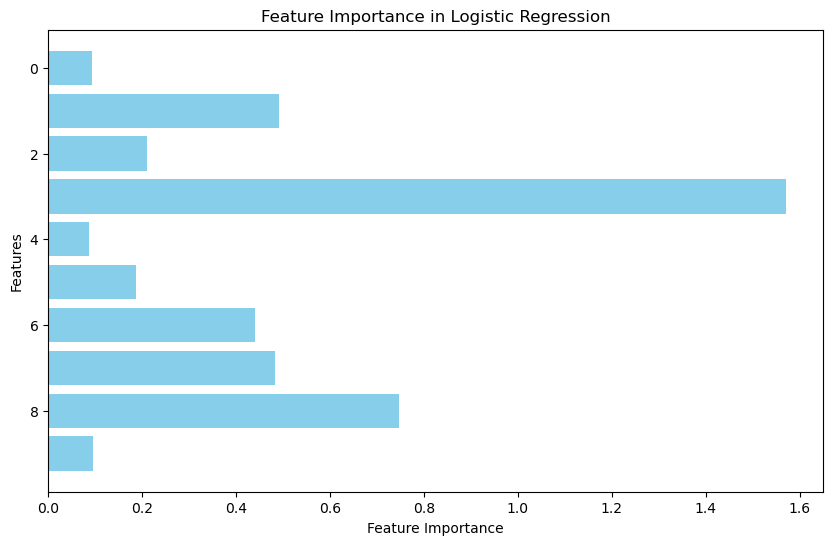

In [57]:
import matplotlib.pyplot as plt

sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis() 
plt.show()


In [59]:
import joblib

joblib.dump(final_model, "logistic_regression_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [61]:
import joblib

# Load the trained logistic regression model
model = joblib.load("logistic_regression_model.pkl")
print("Model loaded successfully!")


Model loaded successfully!


In [65]:
import joblib

# Load the trained model
model = joblib.load("logistic_regression_model.pkl")

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [67]:
!pip install scipy pandas


In [75]:
from scipy.io import arff
import pandas as pd

# Load the ARFF file
data, meta = arff.loadarff(r"E:\intrusion-detection-using-snort-ml-main\Code\NSL-KDD\KDDTest+.arff")

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Convert byte-type columns to string
df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)

print("Test data loaded successfully!")
print(df.head())


ValueError: icmp value not in ('tcp', 'udp', " 'icmp'")

In [77]:
pip install liac-arff


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11729 sha256=dcaf6ae3daf94c9bcd335c564202ecd236a1dd069e7886e834c8fdad9ed95014
  Stored in directory: c:\users\jaini\appdata\local\pip\cache\wheels\a9\ac\cf\c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff
Note: you may need to restart the kernel to use updated packages.


In [81]:
from scipy.io import arff
import pandas as pd

# Load the ARFF file
file_path = r"E:\intrusion-detection-using-snort-ml-main\Code\NSL-KDD\KDDTest+.arff"
data, meta = arff.loadarff(file_path)

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

print("Data Loaded Successfully!")
print(df.head())


Data Loaded Successfully!
   duration protocol_type      service     flag  src_bytes  dst_bytes  land  \
0       0.0        b'tcp'   b'private'   b'REJ'        0.0        0.0  b'0'   
1       0.0        b'tcp'   b'private'   b'REJ'        0.0        0.0  b'0'   
2       2.0        b'tcp'  b'ftp_data'    b'SF'    12983.0        0.0  b'0'   
3       0.0       b'icmp'     b'eco_i'    b'SF'       20.0        0.0  b'0'   
4       1.0        b'tcp'    b'telnet'  b'RSTO'        0.0       15.0  b'0'   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0             0.0     0.0  0.0  ...                10.0   
1             0.0     0.0  0.0  ...                 1.0   
2             0.0     0.0  0.0  ...                86.0   
3             0.0     0.0  0.0  ...                57.0   
4             0.0     0.0  0.0  ...                86.0   

  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                   0.04                    0.06               

In [1]:
from sklearn.preprocessing import LabelEncoder

# Encoding protocol_type
label_encoder = LabelEncoder()
df["protocol_type"] = label_encoder.fit_transform(df["protocol_type"])
print("Protocol Type Encoded Successfully!")


NameError: name 'df' is not defined

In [3]:
from scipy.io import arff
import pandas as pd

# Load the ARFF file
data, meta = arff.loadarff(r"E:\intrusion-detection-using-snort-ml-main\Code\NSL-KDD\KDDTest+.arff")

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Print the first few rows to verify
print("Data Loaded Successfully!")
print(df.head())


Data Loaded Successfully!
   duration protocol_type      service     flag  src_bytes  dst_bytes  land  \
0       0.0        b'tcp'   b'private'   b'REJ'        0.0        0.0  b'0'   
1       0.0        b'tcp'   b'private'   b'REJ'        0.0        0.0  b'0'   
2       2.0        b'tcp'  b'ftp_data'    b'SF'    12983.0        0.0  b'0'   
3       0.0       b'icmp'     b'eco_i'    b'SF'       20.0        0.0  b'0'   
4       1.0        b'tcp'    b'telnet'  b'RSTO'        0.0       15.0  b'0'   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0             0.0     0.0  0.0  ...                10.0   
1             0.0     0.0  0.0  ...                 1.0   
2             0.0     0.0  0.0  ...                86.0   
3             0.0     0.0  0.0  ...                57.0   
4             0.0     0.0  0.0  ...                86.0   

  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                   0.04                    0.06               

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  float64
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  float64
 5   dst_bytes                    22544 non-null  float64
 6   land                         22544 non-null  object 
 7   wrong_fragment               22544 non-null  float64
 8   urgent                       22544 non-null  float64
 9   hot                          22544 non-null  float64
 10  num_failed_logins            22544 non-null  float64
 11  logged_in                    22544 non-null  object 
 12  num_compromised              22544 non-null  float64
 13  root_shell      

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encoding protocol_type
label_encoder = LabelEncoder()
df["protocol_type"] = label_encoder.fit_transform(df["protocol_type"].astype(str))

print("Protocol Type Encoded Successfully!")


Protocol Type Encoded Successfully!


In [11]:
print(df["protocol_type"].head())

0    1
1    1
2    1
3    0
4    1
Name: protocol_type, dtype: int32


In [15]:
# Convert byte columns to string
df = df.map(lambda x: x.decode() if isinstance(x, bytes) else x)

print("Byte literals converted to strings!")
df.head()  


Byte literals converted to strings!


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,private,REJ,0.0,0.0,0,0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0.0,1,private,REJ,0.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2.0,1,ftp_data,SF,12983.0,0.0,0,0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0.0,0,eco_i,SF,20.0,0.0,0,0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1.0,1,telnet,RSTO,0.0,15.0,0,0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [17]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_ra

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['service', 'flag', 'land', 'logged_in', 'is_host_login',
       'is_guest_login', 'class'],
      dtype='object')


In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['service', 'flag', 'class']:
    df[col] = label_encoder.fit_transform(df[col])

print("Categorical columns encoded successfully")
df.head()

Categorical columns encoded successfully


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,45,1,0.0,0.0,0,0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
1,0.0,1,45,1,0.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
2,2.0,1,19,9,12983.0,0.0,0,0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1
3,0.0,0,13,9,20.0,0.0,0,0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0
4,1.0,1,55,2,0.0,15.0,0,0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0


In [27]:
df[['land', 'logged_in', 'is_host_login', 'is_guest_login']].nunique()

land              2
logged_in         2
is_host_login     2
is_guest_login    2
dtype: int64

In [29]:
print(df.isnull().sum().sum())

0


In [35]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [39]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [41]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [43]:
print(df.head())

   duration  protocol_type  service  flag  src_bytes  dst_bytes land  \
0 -0.155534      -0.176303       45     1  -0.021988  -0.096896    0   
1 -0.155534      -0.176303       45     1  -0.021988  -0.096896    0   
2 -0.154113      -0.176303       19     9   0.005473  -0.096896    0   
3 -0.155534      -2.695050       13     9  -0.021946  -0.096896    0   
4 -0.154823      -0.176303       55     2  -0.021988  -0.096189    0   

   wrong_fragment    urgent       hot  ...  dst_host_srv_count  \
0       -0.059104 -0.019459 -0.113521  ...           -1.169697   
1       -0.059104 -0.019459 -0.113521  ...           -1.250212   
2       -0.059104 -0.019459 -0.113521  ...           -0.489800   
3       -0.059104 -0.019459 -0.113521  ...           -0.749234   
4       -0.059104 -0.019459 -0.113521  ...           -0.489800   

  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0              -1.305370               -0.138370                    -0.431856   
1       

In [45]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])  
y = df['class']  

# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (18035, 41), Testing set: (4509, 41)


In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
print("Logistic Regression trained successfully")

Logistic Regression trained successfully


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy Score: 0.9446
Confusion Matrix:
 [[2495   72]
 [ 178 1764]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2567
           1       0.96      0.91      0.93      1942

    accuracy                           0.94      4509
   macro avg       0.95      0.94      0.94      4509
weighted avg       0.95      0.94      0.94      4509



In [51]:
import joblib

# Save the trained logistic regression model
joblib.dump(log_reg, "nids_model_log_reg.pkl")

print("Model saved successfully as 'nids_model_log_reg.pkl'")


Model saved successfully as 'nids_model_log_reg.pkl'


In [53]:

loaded_model = joblib.load("nids_model_log_reg.pkl")

# Make predictions using the loaded model
new_predictions = loaded_model.predict(X_test)

print("Model loaded and predictions made successfully!")


Model loaded and predictions made successfully!


In [55]:
!pip install flask joblib pandas

In [57]:
import joblib
joblib.dump(log_reg, "nids_model_log_reg.pkl")
print("Model Saved Successfully")

Model Saved Successfully
